# **IMPORTING LIBRARIES**

In [ ]:
# Import the Libraries that will be needed later.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **READ AND LOAD THE DATASET**

In [ ]:
# Read the uploaded Dataset and show its first 5 rows.
df = pd.read_csv('telco_data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **DATA CLEANING**

In [ ]:
# Dataframe information (Rows, Column).
df.shape

(7043, 21)

In [ ]:
# Normalize or lowercase all the head column for better analysis.
df.columns = df.columns.str.lower()
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Look for Duplicate values/rows.
df.duplicated().sum()

np.int64(0)

In [ ]:
# Displaying the total number of empty/null values.
df.isnull().sum()

,0
customerid,0
gender,750
seniorcitizen,0
partner,1000
dependents,0
tenure,2500
phoneservice,0
multiplelines,0
internetservice,1000
onlinesecurity,0


In [ ]:
# Checking the data types.
df.dtypes

,0
customerid,object
gender,object
seniorcitizen,int64
partner,object
dependents,object
tenure,float64
phoneservice,object
multiplelines,object
internetservice,object
onlinesecurity,object


In [ ]:
# Change for its appropriate data types
df = df.assign(
    seniorcitizen = df.seniorcitizen.astype(bool),
    monthlycharges = df.monthlycharges.astype(float),
    totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
)

In [ ]:
# Since there are too many null/empty values, decided to fill it with the following values.
df['tenure'] = df['tenure'].fillna(0)
df['gender'] = df['gender'].fillna("Unknown")
df['partner'] = df['partner'].fillna("NA")
df['internetservice'] = df['internetservice'].fillna("NA")
df['streamingtv'] = df['streamingtv'].fillna("NA")
df['monthlycharges'] = df['monthlycharges'].fillna(df.monthlycharges.mean())

# **EXPLORATORY DATA ANALYSIS (EDA)**

In [ ]:
# Churn Rate Percentage(%)
churn_rate = df.churn.value_counts(normalize=True)
churn_rate

,proportion
churn,
No,0.73463
Yes,0.26537


In [ ]:
# Churn count by Contract
churn_by_contract = df.groupby('contract')['churn'].value_counts()
churn_by_contract

contract        churn
Month-to-month  No       2220
                Yes      1655
One year        No       1307
                Yes       166
Two year        No       1647
                Yes        48
Name: count, dtype: int64

In [ ]:
# Churn by the Monthly Charges Average
churn_by_monthlycharges = df.groupby('churn')['monthlycharges'].mean()
churn_by_monthlycharges

,monthlycharges
churn,
No,62.173182
Yes,72.359796


In [ ]:
# Churn by the Total Charges Average
df.groupby('churn')['totalcharges'].mean()

,totalcharges
churn,
No,2555.344141
Yes,1531.796094


In [ ]:
# Churn count by PaymentMethod
churn_by_payment = df.groupby('churn')['paymentmethod'].value_counts()
churn_by_payment

churn  paymentmethod            
No     Mailed check                 1304
       Electronic check             1294
       Credit card (automatic)      1290
       Bank transfer (automatic)    1286
Yes    Electronic check             1071
       Mailed check                  308
       Bank transfer (automatic)     258
       Credit card (automatic)       232
Name: count, dtype: int64

In [ ]:
# Churn count by InternetService
churn_by_internet = df.groupby('churn')['internetservice'].value_counts()
churn_by_internet

churn  internetservice
No     DSL                1681
       Fiber optic        1556
       No                 1202
       NA                  735
Yes    Fiber optic        1104
       DSL                 401
       NA                  265
       No                   99
Name: count, dtype: int64

In [ ]:
# Identifying the overall Average Tenure
df['tenure'].mean().round(2)

np.float64(32.55)

In [ ]:
# Average Tenure by Churn
avg_tenure_bychurn = df.groupby('churn')['tenure'].mean()
avg_tenure_bychurn

,tenure
churn,
No,37.464499
Yes,18.705290


In [ ]:
# Average Tenure by Internet Service
df.groupby('internetservice')['tenure'].mean()

,tenure
internetservice,
DSL,33.257216
Fiber optic,33.244433
No,30.079365


# **Visualization**

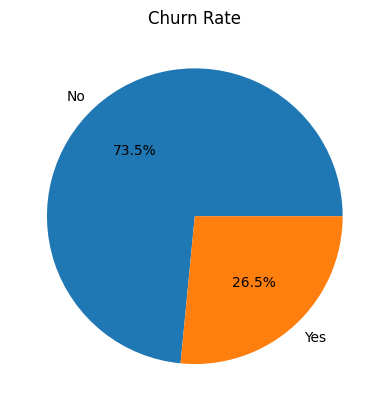

churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64
The analysis shows an overall churn rate of 26.5%, suggesting a
relatively high level of customer attrition that may require targeted retention strategies.


In [ ]:
# Churn Rate
plt.pie(churn_rate, labels=churn_rate.index, autopct='%1.1f%%')
plt.title('Churn Rate')
plt.show()
print(churn_rate)
print("The analysis shows an overall churn rate of 26.5%, suggesting a" "\n" "relatively high level of customer attrition that may require targeted retention strategies.")

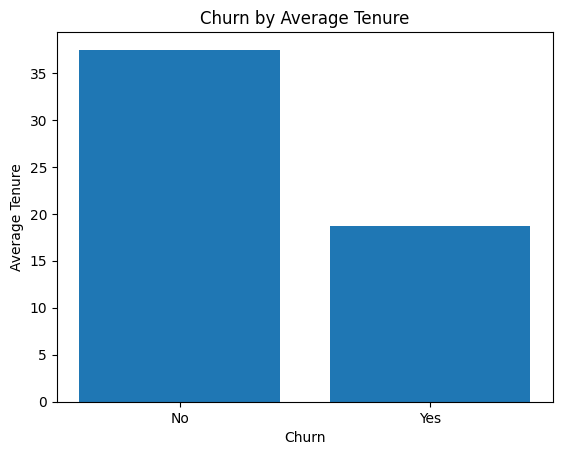

churn
No     37.464499
Yes    18.705290
Name: tenure, dtype: float64
Churned customers show a much shorter average tenure of 18.71 months,
while non-churned customers average 37.46 months, indicating that longer tenure is associated with higher customer retention.


In [ ]:
# Churn by Average Tenure
plt.bar(avg_tenure_bychurn.index, avg_tenure_bychurn.values)
plt.title('Churn by Average Tenure')
plt.xlabel('Churn')
plt.ylabel('Average Tenure')
plt.show()
print(avg_tenure_bychurn)

print("Churned customers show a much shorter average tenure of 18.71 months," "\n" "while non-churned customers average 37.46 months, indicating that longer tenure is associated with higher customer retention.")

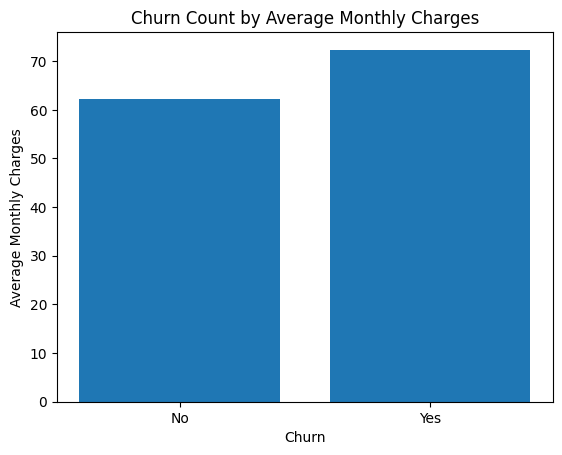

churn
No     62.173182
Yes    72.359796
Name: monthlycharges, dtype: float64
The average monthly charges for churned customers is higher (72.36) compared to non-churned customers (62.17),
suggesting that higher monthly charges may be associated with increased churn.


In [ ]:
# Churn by Average Monthly Charges
plt.bar(churn_by_monthlycharges.index, churn_by_monthlycharges.values)
plt.title('Churn Count by Average Monthly Charges')
plt.xlabel('Churn')
plt.ylabel('Average Monthly Charges')
plt.show()
print(churn_by_monthlycharges)
print("The average monthly charges for churned customers is higher (72.36) compared to non-churned customers (62.17)," "\n" "suggesting that higher monthly charges may be associated with increased churn.")

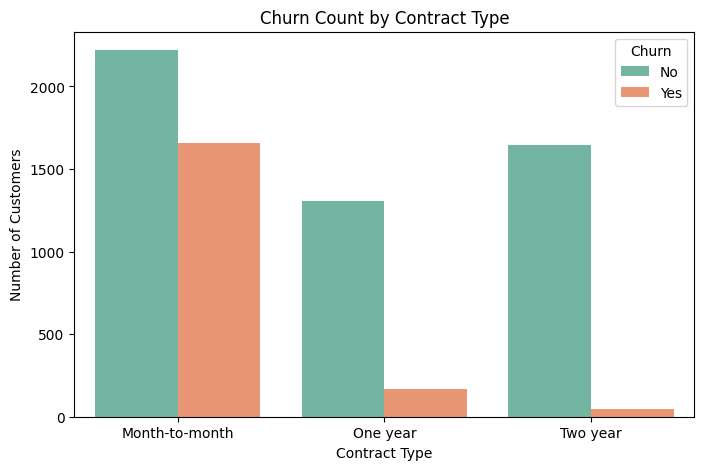

contract        churn
Month-to-month  No       2220
                Yes      1655
One year        No       1307
                Yes       166
Two year        No       1647
                Yes        48
Name: count, dtype: int64
Customers on month-to-month contracts exhibit higher churn compared to one-year and two-year contracts,
although this contract type also has the highest number of non-churned customers due to their larger customer base.


In [ ]:
# Churn by Contract
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='contract', hue='churn', palette='Set2')
plt.title('Churn Count by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.show()
print(churn_by_contract)
print("Customers on month-to-month contracts exhibit higher churn compared to one-year and two-year contracts," "\n" "although this contract type also has the highest number of non-churned customers due to their larger customer base.")

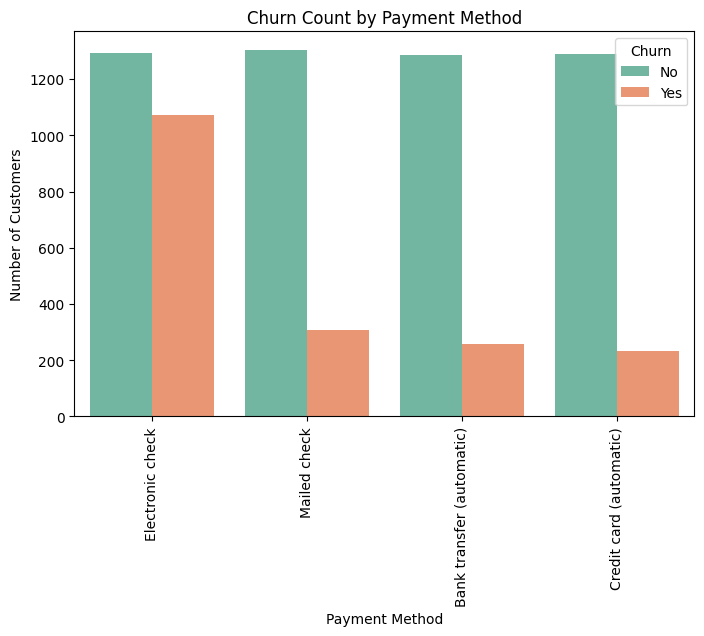

churn  paymentmethod            
No     Mailed check                 1304
       Electronic check             1294
       Credit card (automatic)      1290
       Bank transfer (automatic)    1286
Yes    Electronic check             1071
       Mailed check                  308
       Bank transfer (automatic)     258
       Credit card (automatic)       232
Name: count, dtype: int64
Electronic check has the highest number of churned customer (1,071)
while those using credit card (automatic) have the lowest churn count (232).


In [ ]:
# Churn by Payment Method
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='paymentmethod', hue='churn', palette='Set2')
plt.title('Churn Count by Payment Method')
plt.xlabel('Payment Method')
plt.xticks(rotation=90)
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.show()
print(churn_by_payment)
print("Electronic check has the highest number of churned customer (1,071)" "\n" "while those using credit card (automatic) have the lowest churn count (232).")

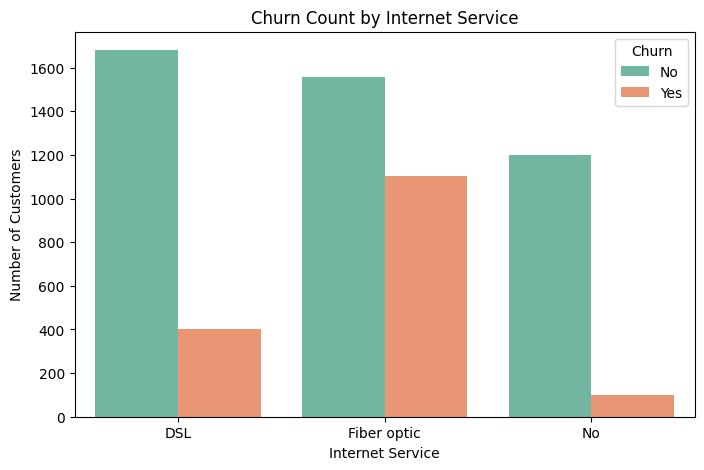

churn  internetservice
No     DSL                1681
       Fiber optic        1556
       No                 1202
       NA                  735
Yes    Fiber optic        1104
       DSL                 401
       NA                  265
       No                   99
Name: count, dtype: int64
Fiber optic internet service records the highest number of churned customers (1,104).
In comparison, DSL has a lower number of churned customers (401) while also maintaining the highest number of non-churned customers.
Customers with no or unknown internet service show relatively lower churn levels.


In [ ]:
# Churn by Payment Method
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='internetservice', hue='churn', palette='Set2')
plt.title('Churn Count by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.show()
print(churn_by_internet)
print("Fiber optic internet service records the highest number of churned customers (1,104)." "\n" "In comparison, DSL has a lower number of churned customers (401) while also maintaining the highest number of non-churned customers." "\n" "Customers with no or unknown internet service show relatively lower churn levels.")